### `Receiver Operating Curve (ROC)`

The ROC curve plots the true positive rate versus the false positive rate for various thresholds.

The area under curve (AUC) measures how well the classifier separates classes. 

The AUC of the ROC curve is between zero and one, and a higher number means the model performs better in separating the classes.

The most optimal is a curve that "hugs" the top lef of the plot, as shown below. This indicates that a model has a high true-positive rate and relatively low false-position rate.

### Binary Class

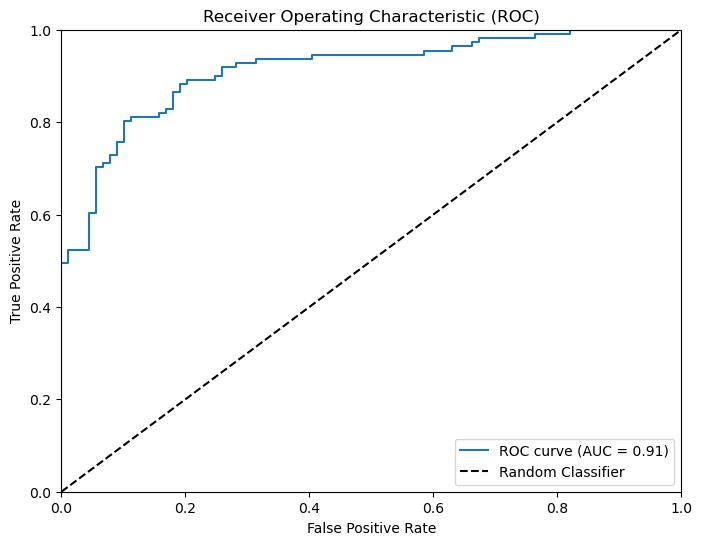

In [9]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

# Generate a random classification dataset
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities for the test set
y_probs = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

### Multi-class

Although traditional ROC curves are designed for binary classification problems as they represent the trade-off between true positive (TPR) and false positive rate (FPR), for multi-class classification, there are a few approaches to adapting ROC analysis:

1. **One-vs-Rest (OvR) ROC**: You treat each class as the positive class while considering the rest as the negative class. You can compute the ROC curve and AUC for each class separately and then average the results.

2. **One-vs-One (OvO) ROC**: You create a binary classifier for each pair of classes. For a multi-class problem with 'n' classes you would have n*(n-1)/2 binary classifiers. ROC curves and AUC scores can be computed for each binary classifier, and the results can be averaged.

3. **Micro-average and Macro-average ROC**: The micro-average ROC computes the overall ROC curve by considering all instances and calculating the aggregate true positive and false positive rates. The macro-average ROC, on the other hand, computes the ROC curve for each class separately and then averages them. Micro-average gives equal weight to each instance, while macro-average gives equal weight to each class.

To perform multi-class ROC analysis, you would typically use appropriate evaluation metrics such as micro-averaged AUC, macro-averaged AUC, or individual class AUC scores.

It's worth noting that scikit-learn's `roc_curve` and `roc_auc_score` functions are designed for binary classification. For multi-class ROC analysis, scikit-learn provides `roc_auc_score` with the `multi_class` parameter set to calculate the AUC using the chosen method (e.g., 'ovr' for One-vs-Rest). Additionally, scikit-plot library provides functionality for plotting ROC curves for multi-class problems.

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


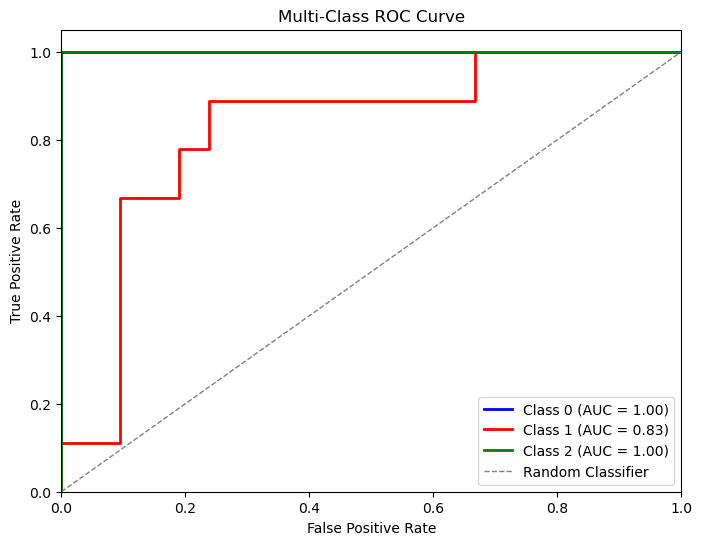

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc


# Load the iris dataset
data = load_iris()
X = data.data
y = data.target


# Binarize the target variable
y_bin = label_binarize(y, classes=[0, 1, 2])
n_classes = y_bin.shape[1]

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# Train a logistic regression model using One-vs-Rest strategy
model = OneVsRestClassifier(LogisticRegression())
model.fit(X_train, y_train)

# Predict probabilities for the test set
y_probs = model.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Plot random guessing line
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Random Classifier')

# Set plot properties
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc="lower right")
plt.show()